## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="left" )

# Display the data table for preview
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
combined_data.rename(columns = {'Mouse ID':'mouse_id'}, inplace = True)
number_of_mice = combined_data.nunique()
number_of_mice
mouse_data= combined_data["mouse_id"].value_counts()
mouse_data


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: mouse_id, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_data.duplicated().sum()

1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_data = combined_data.Timepoint.duplicated()
#duplicate_frame = combined_data.loc[duplicate_data, :]
#duplicate_frame.head()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['mouse_id', 'Timepoint'])
clean_data

,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["mouse_id"].value_counts()


k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: mouse_id, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#tumor_volume = clean_data['Tumor Volume (mm3)']

#mean_numpy = np.mean(tumor_volume)
#median_numpy = np.median(tumor_volume)
#mode_scipy = st.mode(tumor_volume)
#print (f" The mean is {mean_numpy}")
#print (f" The median is {median_numpy}")
#print (f" The mode is {mode_scipy[0][0]}")

tumor_volume = clean_data['Tumor Volume (mm3)']
drug_regimen = clean_data.groupby('Drug Regimen')
sex = clean_data['Sex']

tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean(),
tumor_median = drug_regimen["Tumor Volume (mm3)"].median(),
tumor_mode = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(pd.Series.mode),
tumor_variance = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(),
tumor_std = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(),
tumor_sem = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

new_df = {
    'Tumor mean':drug_regimen["Tumor Volume (mm3)"].mean(),
    'Tumor Median':drug_regimen["Tumor Volume (mm3)"].median(),
    'Tumor Variance':clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var(),
    'Tumor Standard Deviation':clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std(),
    'Tumor SEM':clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
}

tumor_df = pd.DataFrame(new_df)
print(tumor_df)

              Tumor mean  Tumor Median  Tumor Variance  \
Drug Regimen                                             
Capomulin      40.675741     41.557809       24.947764   
Ceftamin       52.591172     51.776157       39.290177   
Infubinol      52.884795     51.820584       43.128684   
Ketapril       55.235638     53.698743       68.553577   
Naftisol       54.331565     52.509285       66.173479   
Placebo        54.033581     52.288934       61.168083   
Propriva       52.393463     50.909965       43.138803   
Ramicane       40.216745     40.673236       23.486704   
Stelasyn       54.233149     52.431737       59.450562   
Zoniferol      53.236507     51.818479       48.533355   

              Tumor Standard Deviation  Tumor SEM  
Drug Regimen                                       
Capomulin                     4.994774   0.329346  
Ceftamin                      6.268188   0.469821  
Infubinol                     6.567243   0.492236  
Ketapril                      8.279709   0.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#clean_data['Tumor Volume (mm3)'].describe()
drug_regimen.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]}) 

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.909965  52.393463  43.138803  6.568014  0.525862
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

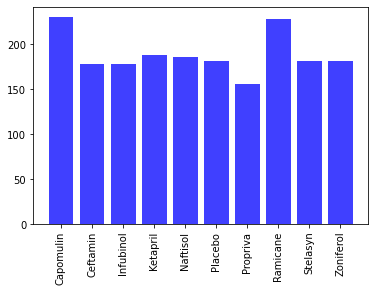

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = np.arange(len(drug_regimen["Drug Regimen"]))
mouse_count = drug_regimen["mouse_id"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["mouse_id"]

plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")


tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)
plt.show()


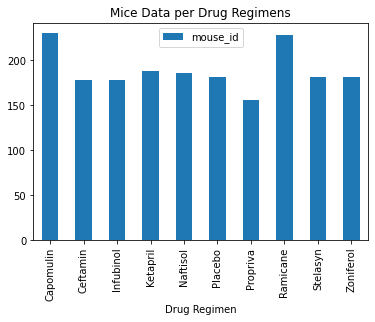

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_count_df.plot(kind="bar")
plt.title("Mice Data per Drug Regimens")  
plt.show()

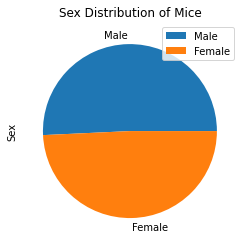

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_data["Sex"].value_counts()
sex_data = sex.to_frame()

sex_pie = sex_df.plot(kind="pie", y='Sex', title=("Sex Distribution of Mice"))

plt.show()

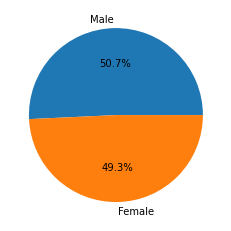

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Male","Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor = clean_data.groupby("mouse_id", as_index=False)["Timepoint"].max()
clean_data.merge(last_tumor, on= ["mouse_id", "Timepoint"], how="left")

,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
treatment = ["Capomulin", "Ramicane", "Infubinol", "Naftisol"]
tumor_volume = []
    
for drug in treatment:
    volume = combined_data.loc[combined_data["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    
#The quartiles as standard
quartile = volume.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
    
low_bound = lower - (1.5*iqr)
up_bound = upper + (1.5*iqr)
outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
if len(outliers) > 0:
    print(f"The outliers for {drug} are {outliers}.")
    

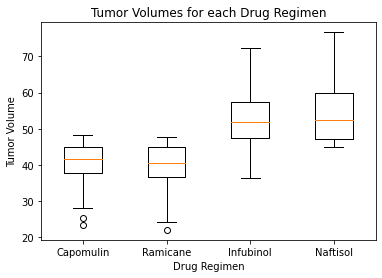

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")

plt.show()

## Line and Scatter Plots

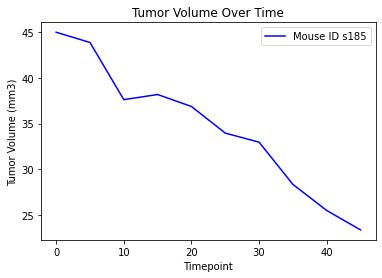

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_185 = clean_data.loc[clean_data["mouse_id"]=="s185"]

x = mouse_185["Timepoint"]
y = mouse_185["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

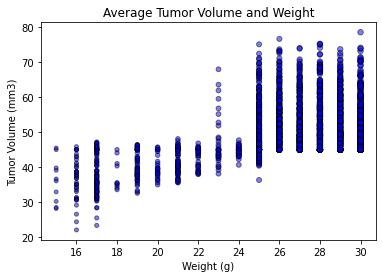

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_values = combined_data["Weight (g)"]
y_values = combined_data["Tumor Volume (mm3)"]


plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=x_values, alpha=0.5)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.59


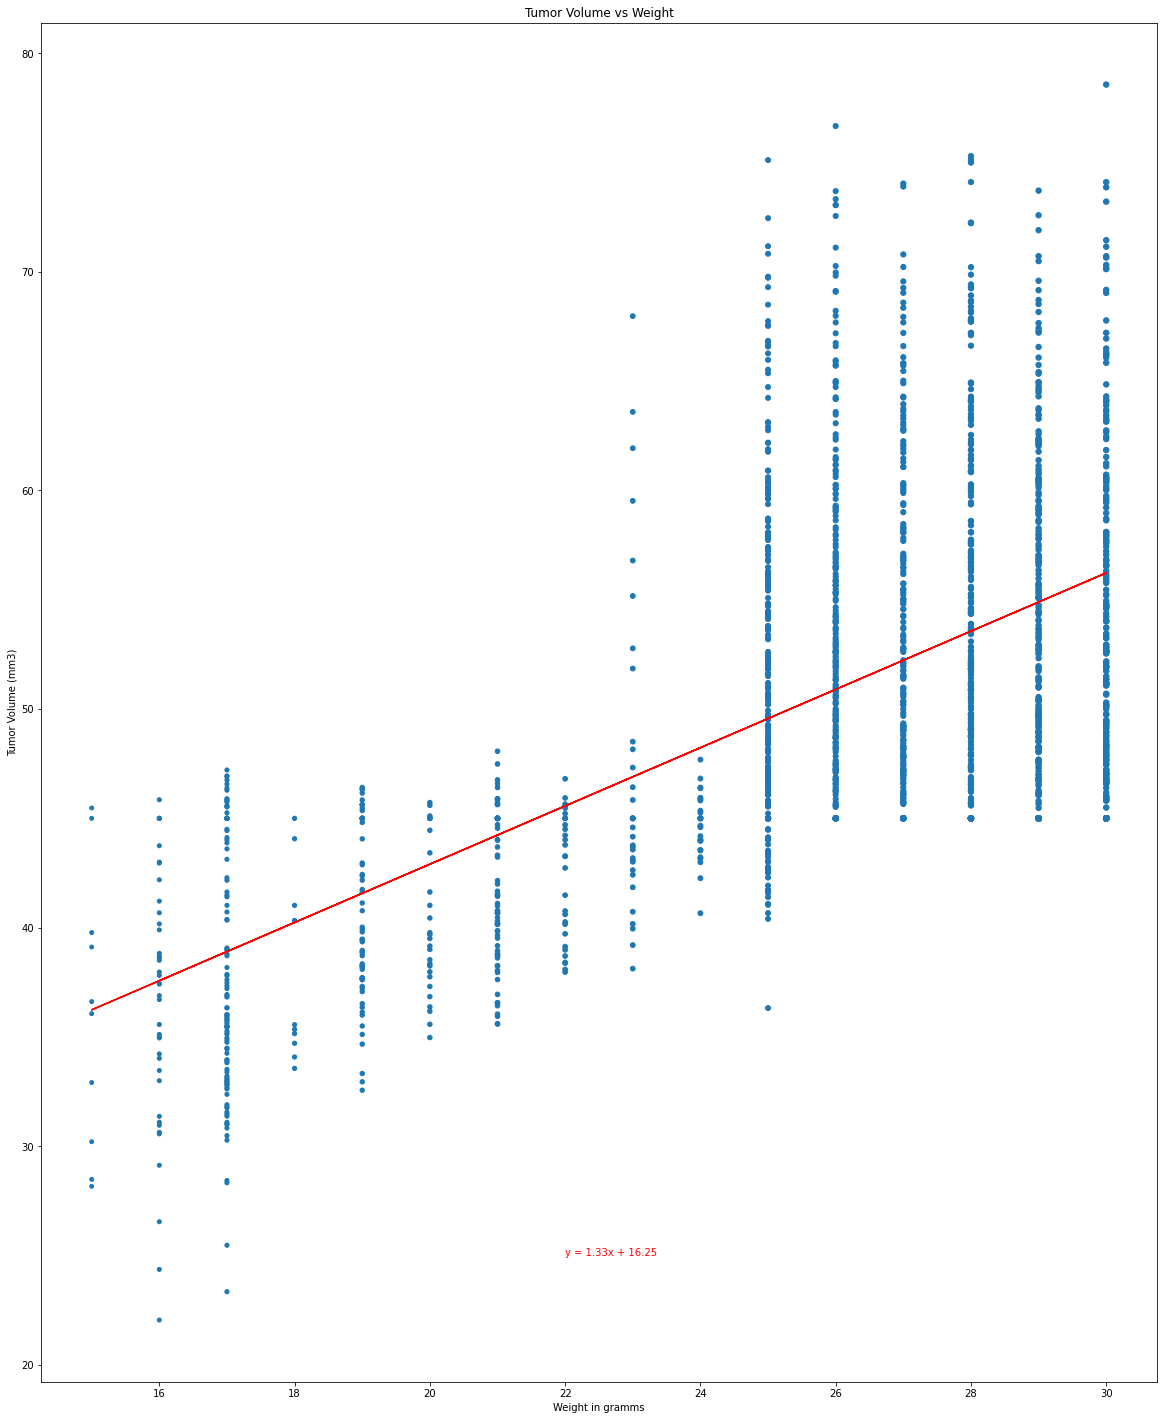

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = combined_data["Weight (g)"]
y_values = combined_data["Tumor Volume (mm3)"]

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(20, 25))

plt.scatter(x_values, y_values, marker="o", s=x_values)
plt.title("Tumor Volume vs Weight")
plt.xlabel("Weight in gramms")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,25),color="red")

print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")